<a href="https://colab.research.google.com/github/Lilchoto3/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [102]:
# set up sales list
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

# import these for later
import numpy as np
import pandas as pd
import math

def get_data_about_info(data_in):
  '''
  Gets the mean, variance, and standard deviation of any list inputted,
  provided the list only contains numbers.

  data_in: list of numbers to get data about
  ------------------------------------------
  returns: mean, variance, std. deviation
  '''
  # get length of list
  n = len(data_in)

  # set up mean variable and get mean
  data_sum = 0
  for x in data_in:
    data_sum += x
  
  mean = data_sum / n

  # get sum of distances and square them
  dist_sum = 0
  for x in data_in:
    dist_sum += (x - mean)**2
  
  # create variance
  var = (dist_sum)/(n-1)

  # create standard deviation
  stddev = (var)**0.5

  # print info
  return mean, var, stddev

print('My Function results:')
mean, var, stddev = get_data_about_info(sales)
print(f'Mean: {mean}')
print(f'Variance: {var}')
print(f'Standard Deviation: {stddev}')

# Test against library functions

print('\nLibrary function results:')
print(f'Mean: {np.mean(sales)}')
print(f'Variance: {np.var(sales, ddof=1)}')
print(f'Standard Deviation: {np.std(sales, ddof=1)}')

My Function results:
Mean: 3052.714285714286
Variance: 214387.90476190473
Standard Deviation: 463.0204150595357

Library function results:
Mean: 3052.714285714286
Variance: 214387.90476190473
Standard Deviation: 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [103]:
customers = [127, 80, 105, 92, 120, 115, 93]

df = pd.DataFrame({'sales':sales, 'customers':customers})

df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [104]:
# Use previously created function to get standard deviation
_, _, stddev_customers = get_data_about_info(customers)
_, _, stddev_sales = get_data_about_info(sales)

print(stddev_customers, stddev_sales)

# Create correlation table from covariance table
df_corr = df.cov()
df_corr.loc['sales',:] = df_corr.loc['sales',:] / stddev_sales
df_corr.loc['customers',:] = df_corr.loc['customers',:] / stddev_customers
df_corr.loc[:,'sales'] = df_corr.loc[:,'sales'] / stddev_sales
df_corr.loc[:,'customers'] = df_corr.loc[:,'customers'] / stddev_customers

print(f'Created Table:\n{df_corr}\n')

# Check my work
print(f'Library Function:\n{df.corr()}')

17.057326313123664 463.0204150595357
Created Table:
              sales  customers
sales      1.000000   0.962834
customers  0.962834   1.000000

Library Function:
              sales  customers
sales      1.000000   0.962834
customers  0.962834   1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [119]:
# Read the data, also drop the 'Unnamed' column because it's unneeded data
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

df = df.drop('Unnamed: 0', axis=1)

print(df.shape)
df.head()

(1310, 15)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [120]:
df.isnull().sum()

pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [121]:
# Get the co-variance table
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [122]:
# From this, also create a list of every column with numerical data
columns =['pclass','survived', 'age', 'sibsp', 'parch', 'fare', 'body', 'has_cabin_number']

# Also create standard deviations of these columns and create the correlation matrix
df_corr = df.cov()
for col in columns:
  stddev = np.std(df[col], ddof=1)
  # I tried my damndest to get my previous function to work, but I had an issue with
  # NaNs and strings being inputted in columns whose dtypes were float and int

  df_corr.loc[col,:] = df_corr.loc[col,:] / stddev
  df_corr.loc[:,col] = df_corr.loc[:,col] / stddev

df_corr

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366510,0.060832,0.018322,-0.558691,-0.035144,-0.714051
survived,-0.312469,1.000000,-0.050218,-0.027825,0.082660,0.244301,0.000000,0.302332
age,-0.366510,-0.050218,1.000000,-0.190820,-0.130922,0.171652,0.064874,0.271887
sibsp,0.060832,-0.027825,-0.190820,1.000000,0.373587,0.160285,-0.085573,-0.009067
parch,0.018322,0.082660,-0.130922,0.373587,1.000000,0.221607,0.050107,0.036816
fare,-0.558691,0.244301,0.171652,0.160285,0.221607,1.000000,-0.035431,0.507529
body,-0.035144,0.000000,0.064874,-0.085573,0.050107,-0.035431,1.000000,0.088812
has_cabin_number,-0.714051,0.302332,0.271887,-0.009067,0.036816,0.507529,0.088812,1.000000


In [123]:
# Check against library function
df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


In [0]:
# I don't know why body vs. survived is NaN or zero in the correlation table, my guess is because
# body has so many NaN values to begin with it can't really get a good enough idea

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

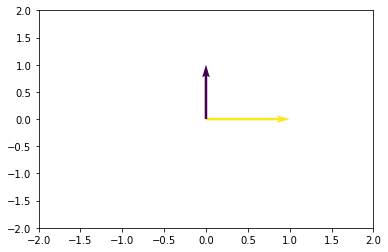

In [132]:
# A synonym for othogonal is 'perpendicular'

import matplotlib.pyplot as plt

# Set up vectors
vec_a = [0,0,1,0]
vec_b = [0,0,0,1]

vectors = [vec_a, vec_b]
x, y, dx, dy = zip(*vectors)

fig, ax = plt.subplots()
ax.quiver(x, y, dx, dy, np.arctan2(dx, dy), angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [133]:
# If they're orthogonal, then their dot product should be zero.
vec_a = [-5, 3, 7]
vec_b = [6, -8, 2]

np.dot(vec_a, vec_b)

# They are not orthogonal.

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [161]:
vec_c = np.array([2, -15, 6, 20])

print(f'||c||^2 = {np.linalg.norm(vec_c)**2}')
print(f'c • c = {np.dot(vec_c, vec_c)}')
print(f'c^T*c = {np.matmul(vec_c.T, vec_c)}')

# They're all the same number, which means that the norm of vector c, squared,
# the dot product of vector c with itself, and vector c transposed times
# vector c are all related.

||c||^2 = 665.0
c • c = 665
c^T*c = 665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k} 
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [152]:
vec_f = np.array([4, 12, 11, 9, 2])
vec_f_norm = np.linalg.norm(vec_f)
vec_f_unit = vec_f / vec_f_norm

print(f'Vector F:\n{vec_f}')
print(f'Vector F norm: {vec_f_norm}')
print(f'Vector F hat:\n{vec_f_unit}')

Vector F:
[ 4 12 11  9  2]
Vector F norm: 19.131126469708992
Vector F hat:
[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

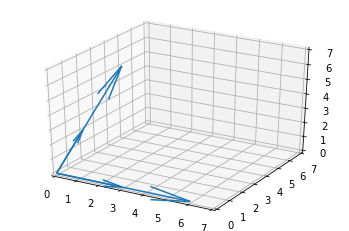

In [156]:
from mpl_toolkits.mplot3d import Axes3D
v_3D = np.array([[0,0,0,3,0,0],
                 [0,0,0,0,5,5],
                 [0,0,0,6,0,0],
                 [0,0,0,0,2,2]])

x, y, z, dx, dy, dz = zip(*v_3D)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(x,y,z,dx,dy,dz,length=1)
ax.set_xlim([0,7])
ax.set_ylim([0,7])
ax.set_zlim([0,7])

plt.show()

In the above graph, I've created two linearly independant and two linearly dependant vectors, as shown by the two lines. My two unit vectors are

\begin{align}
\hat{i} = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}
\end{align}

and

\begin{align}
\hat{j} = \begin{bmatrix} 0 \\ 1 \\ 1 \end{bmatrix}
\end{align}

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [159]:
# I'm going use random to generate scalars for linear combination to get an idea of the span
import random as rand

# Set up vectors
vec_g = np.array([1, 2])
vec_h = np.array([4, 8])

span = []

for i in range(10):
  span.append(rand.randint(-5, 5) * vec_g + rand.randint(-5, 5) * vec_h)

span = np.array(span)

print(span)

[[ 17  34]
 [  7  14]
 [  7  14]
 [  1   2]
 [-15 -30]
 [ -3  -6]
 [ 11  22]
 [  7  14]
 [-13 -26]
 [ -6 -12]]


In [0]:
# From what I can see, the span of the vectors all fall along the line created by
# the vector of [1, 2]

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [162]:
vec_l = np.array([1, 2, 3])
vec_m = np.array([-1, 0, 7])
vec_n = np.array([4, 8, 2])

span = []

for i in range(10):
  span.append(rand.randint(-5, 5) * vec_l + rand.randint(-5, 5) * vec_m + rand.randint(-5, 5) * vec_n)

span = np.array(span)

print(span)

[[ 12  16 -34]
 [ -4 -18 -32]
 [  5  14  25]
 [ 12  22 -14]
 [ 17  26 -29]
 [-15 -40 -55]
 [-14 -22  28]
 [ -9  -8  23]
 [ -8 -12  16]
 [ 13  22 -11]]


In [0]:
# From what I can see, the span of all the vectors fall within anywhere within R^3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



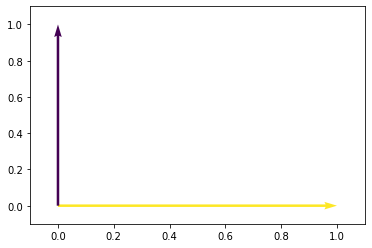

In [164]:
fig, ax = plt.subplots()

basis_vectors = np.array([[0,0,1,0],
                          [0,0,0,1]])

x, y, dx, dy = zip(*basis_vectors)

ax.quiver(x,y,dx,dy,np.arctan2(dx, dy), angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-.1,1.1])
ax.set_ylim([-.1,1.1])

plt.show()

## 6.2 What does it mean to form a basis?

To form a basis means to create $n$ vectors for vector space $\mathbb{R}^n$, of which all are linearly independant from one another.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

**Answer:**
The rank of P is three, since there are no rows that are linearly dependant on other rows.

Reduced Row-Echelon form of P:
\begin{align}
P_r = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 10 \\
0 & 0  & -10
\end{bmatrix}
\end{align}

Continuing by doing Gaussian Elimination:
\begin{align}
P_r = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 0 \\
0 & 0  & -10
\end{bmatrix}
\end{align}

\begin{align}
P_r = \begin{bmatrix} 
1 & 0 & 3 \\
 0 & 2 & 0 \\
0 & 0  & -10
\end{bmatrix}
\end{align}

\begin{align}
P_r = \begin{bmatrix} 
1 & 0 & 0 \\
 0 & 2 & 0 \\
0 & 0  & -10
\end{bmatrix}
\end{align}

\begin{align}
P_r = \begin{bmatrix} 
1 & 0 & 0 \\
 0 & 1 & 0 \\
0 & 0  & 1
\end{bmatrix}
\end{align}

This proves the matrix's rank of 3 since all three rows are linearly independant.

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us what the actual dimensionality of a matrix is. Matrixes can have rows that are dependant on other rows, meaning that you can create the values of those rows using scalars or by adding or subtracting other rows.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

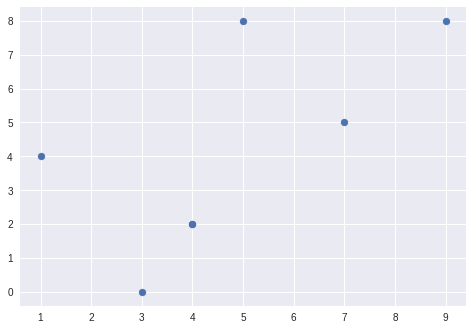

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()